In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import utils 
import torch
from torch import nn


/home/acercyc/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

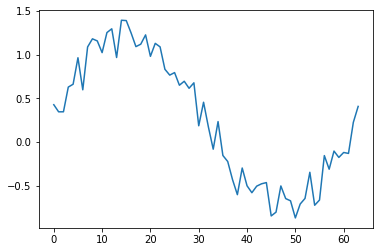

In [3]:
data = np.linspace(0, 2*np.pi, 64)
data = np.sin(data)
data = np.tile(data, (128, 1))
data = data + np.random.random(data.shape)/2
plt.plot(data[0, :])

In [105]:
nFeature = 16
class model_1(nn.Module):
    def __init__(self, nFeature=nFeature, nhead=1, dim_feedforward=16, num_layers=1, dropout=0.1):
        super(model_1, self).__init__()
        encoder_ = nn.TransformerEncoderLayer(d_model=nFeature,
                                        nhead=nhead,
                                        dim_feedforward=dim_feedforward,
                                        batch_first=True, 
                                        activation='gelu',
                                        dropout=dropout)
        self.encoder = nn.TransformerEncoder(encoder_, num_layers=num_layers)

    def forward(self, x):
        y = self.encoder(x)
        return y



model = model_1().to(device)
x = torch.from_numpy(data).float().to(device)
x = x.unsqueeze(2)
x = x.repeat((1, 1, nFeature))

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
# model = model_1()
# x = torch.rand(32, 10, nFeature)
# y = model(x)
# y

In [54]:
nFeature = 16
class model_1(nn.Module):
    def __init__(self, nFeature=nFeature, nhead=1, dim_feedforward=16, num_layers=1, dropout=0.1):
        super(model_1, self).__init__()
        self.conv = nn.Conv1d(1, nFeature, 1)
        encoder_ = nn.TransformerEncoderLayer(d_model=nFeature,
                                        nhead=nhead,
                                        dim_feedforward=dim_feedforward,
                                        batch_first=True, 
                                        activation='gelu',
                                        dropout=dropout)
        self.encoder = nn.TransformerEncoder(encoder_, num_layers=num_layers)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.conv(x)
        x = x.permute(0, 2, 1)
        y = self.encoder(x)
        y = y[:, :, 0:1]
        return y



model = model_1().to(device)
x = torch.from_numpy(data).float().to(device)
x = x.unsqueeze(2)
# x = x.repeat((1, 1, nFeature))

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
# model = model_1()
# x = torch.rand(32, 10, nFeature)
y = model(x)
# y

In [99]:
model.train()
for epoch in range(100):
    optimizer.zero_grad()
    y = model(x)
    loss = criterion(x, y)
    loss.backward()
    optimizer.step() 
    # print(loss.item())


In [91]:
nTime = np.arange(30, 50)

In [102]:
# vari length
model.train()
x_ = x[:, nTime, :]
for epoch in range(100):
    optimizer.zero_grad()
    y_ = model(x_)
    loss = criterion(x_, y_)
    loss.backward()
    optimizer.step() 
    # print(loss.item())

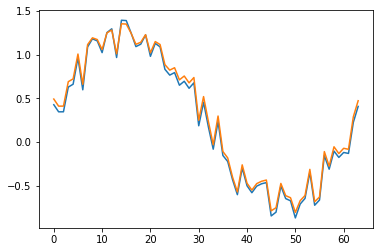

In [103]:
model.eval()
y = model(x)
y_ = y.detach().cpu().numpy()
x_ = x.detach().cpu().numpy()
plt.figure()
plt.plot(x_[0, :, 0])
plt.plot(y_[0, :, 0])
# y_

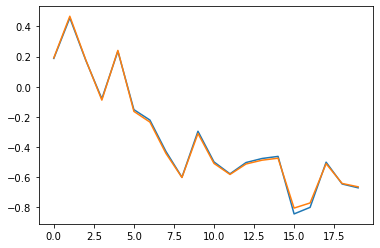

In [104]:
model.eval()
x_ = x[:, nTime, :]
y_ = model(x_)
y_ = y_.detach().cpu().numpy()
x_ = x_.detach().cpu().numpy()
plt.figure()
plt.plot(x_[0, :, 0])
plt.plot(y_[0, :, 0])

In [100]:
nFeature = 10
encoder_layer = nn.TransformerEncoderLayer(d_model=nFeature, 
                                           nhead=1, 
                                           activation='gelu',
                                           dim_feedforward=16,
                                           batch_first=True)
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=1)

# src = torch.rand(32, 10, nFeature)

src = torch.rand(32, 10, 1)
src = src.repeat((1, 1, nFeature))



# out = transformer_encoder(src)
# out

transformer_encoder = transformer_encoder.to(device)
out = transformer_encoder(src.to(device))
out

tensor([[[-0.2434, -1.4392,  0.5353,  ...,  0.9233, -1.2760,  0.5801],
         [-0.1185, -1.3067,  0.6932,  ...,  0.7176, -1.1372, -0.5397],
         [-0.2910, -1.2665,  0.3510,  ...,  1.1704, -1.1281, -0.6259],
         ...,
         [-0.0893, -1.2042,  0.6019,  ...,  1.0468, -1.0753, -0.8406],
         [-0.1866, -1.2717,  0.3409,  ...,  0.5146, -1.2568, -0.9440],
         [-0.1801, -1.2614,  0.7197,  ...,  0.9568, -1.0962, -0.8571]],

        [[-0.2466, -1.2822,  1.0870,  ...,  0.9956, -1.1564, -0.5900],
         [-0.2462, -1.3793,  0.5473,  ...,  0.9610, -1.3288,  0.5830],
         [-0.2347, -1.2120,  1.0680,  ...,  1.2679, -1.1363, -0.8281],
         ...,
         [-0.2009, -1.3976,  0.6164,  ...,  0.8462, -1.3192, -0.7910],
         [ 0.3516, -1.5027,  0.3049,  ...,  0.9072,  0.5303, -0.9750],
         [-0.3085, -1.5104,  0.9582,  ...,  0.5975,  0.7982, -0.9941]],

        [[-0.2522, -1.5760,  1.4251,  ...,  0.8641,  0.8847, -0.8602],
         [-0.4269, -1.3487,  0.8484,  ...,  0

In [80]:
encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
src = torch.rand(10, 32, 512)
out = transformer_encoder(src)
out

tensor([[[-0.4016, -0.3352, -1.3450,  ..., -0.6946,  0.1325, -0.2213],
         [-0.6497, -1.2454, -0.2542,  ..., -0.4871,  0.0460, -0.7788],
         [-1.2152, -0.6605, -1.2638,  ..., -0.2336, -0.1403, -0.3001],
         ...,
         [-0.4580,  0.0149,  0.6100,  ..., -0.0617,  0.5307,  1.1141],
         [-0.9561, -0.8807, -0.4972,  ..., -0.4643,  0.3281, -0.1904],
         [-0.1114,  0.2439, -0.9574,  ..., -1.1174,  0.5744,  0.6816]],

        [[-0.5458, -0.6337, -0.8612,  ..., -0.4901,  0.6178, -0.7928],
         [-0.7211, -0.8112, -0.6624,  ..., -0.6258,  0.2720, -0.4216],
         [-0.6884, -0.3801, -0.5452,  ...,  0.4263, -0.1700, -0.1761],
         ...,
         [-0.1838, -0.0241, -0.4391,  ...,  0.2536,  0.2154, -0.0642],
         [ 0.0405, -1.1664, -0.2536,  ...,  0.1347, -0.2475,  0.2564],
         [-0.5082, -0.1030, -1.1790,  ..., -0.7871,  0.7200, -0.1388]],

        [[-0.7778, -0.9378, -1.2282,  ..., -0.5236,  0.6272, -1.0475],
         [-0.9951, -0.8284, -1.5453,  ..., -0